# Finals Summray 13-15


## Supervised Learning: Decision Tree

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

UsageError: Line magic function `%` not found.


1. load all the data from the diabetes.csv (with our own header!!)
2. print out all the correlations in the data set (table)
3. print out all the correlations as a heatmap

In [ ]:
diabetes = pd.read_csv('resources/diabetes.csv', header=0, names=col_names)
corr = diabetes.corr()
sns.heatmap(corr)

4. split the data in X and y and split it then in train and test data

In [ ]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

In [ ]:
X = diabetes[feature_cols]
y = diabetes.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5. print how many rows and columns X_train has

In [ ]:
X_train.shape

6. make a decision tree with the gini index
7. predict the test data
8. evaluate the model

In [ ]:
dec_tree_classifier = DecisionTreeClassifier(criterion='gini')
dec_tree_classifier = dec_tree_classifier.fit(X_train, y_train)
y_prediction = dec_tree_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_prediction))

9. visualize the found data
10. save found data as a png

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

In [ ]:
dot_data = StringIO()

export_graphviz(dec_tree_classifier,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

2nd Example - Iris
1. import the iris data set
2. transform the data into a dataframe
3. get X and y
4. split in train and test data
5. do the decision tree
6. print the accuracy score

In [ ]:
iris = datasets.load_iris()
irises = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dec_tree_classifier.fit(X_train, y_train)
y_prediction = dec_tree_classifier.predict(X_test)
dec_tree_classifier.score(X_test, y_test)  # print(metrics.accuracy_score(y_test, y_prediction))

7. predict with a random object (e.g., 4,3,5,2)

In [ ]:
print(dec_tree_classifier.predict([[4, 3, 5, 2]]))

8. print out the decision treee

In [ ]:
dot_data = StringIO()

export_graphviz(dec_tree_classifier,
                out_file=dot_data,
                special_characters=True,
                feature_names=iris.feature_names,
                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

10. print out the other way ??

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dec_tree_classifier,
               iris['data'],
               iris['target'],
               target_name='species',
               feature_names=np.array(iris['feature_names']),
               class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica'})
viz

## Supervised Learning: Random Forest

1. use the same X and y that we used earlier and split it into train and test data
2. do the random forest with the data
3. do the test with the test data and print the accuracy score

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_prediction = rf.predict(X_test)
metrics.accuracy_score(y_test, y_prediction)


1.0

4. find out the feature importance
5. print it in a barplot

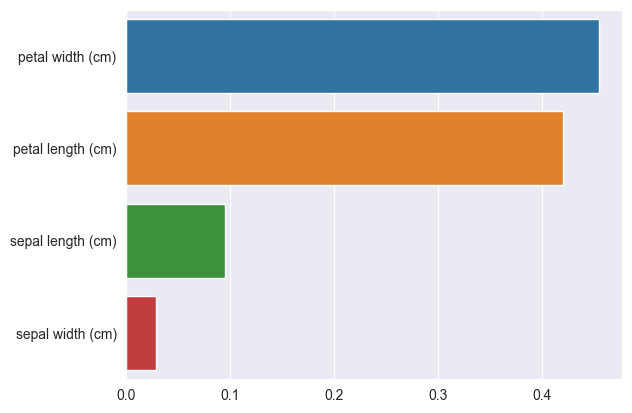

In [6]:
feature_importance = pd.Series(rf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

## Supervised Learning: Unsupervised Learning: K-Means clustering

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

1. import the mall_customers-3.csv
2. rename 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'
3. print out how many NaN are in the df

In [8]:
mall_customers = pd.read_csv('resources/mall_customers-3.csv')
mall_customers.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'},
                      inplace=True)
mall_customers.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

4. do pairplots in which the data is color-separated by gender

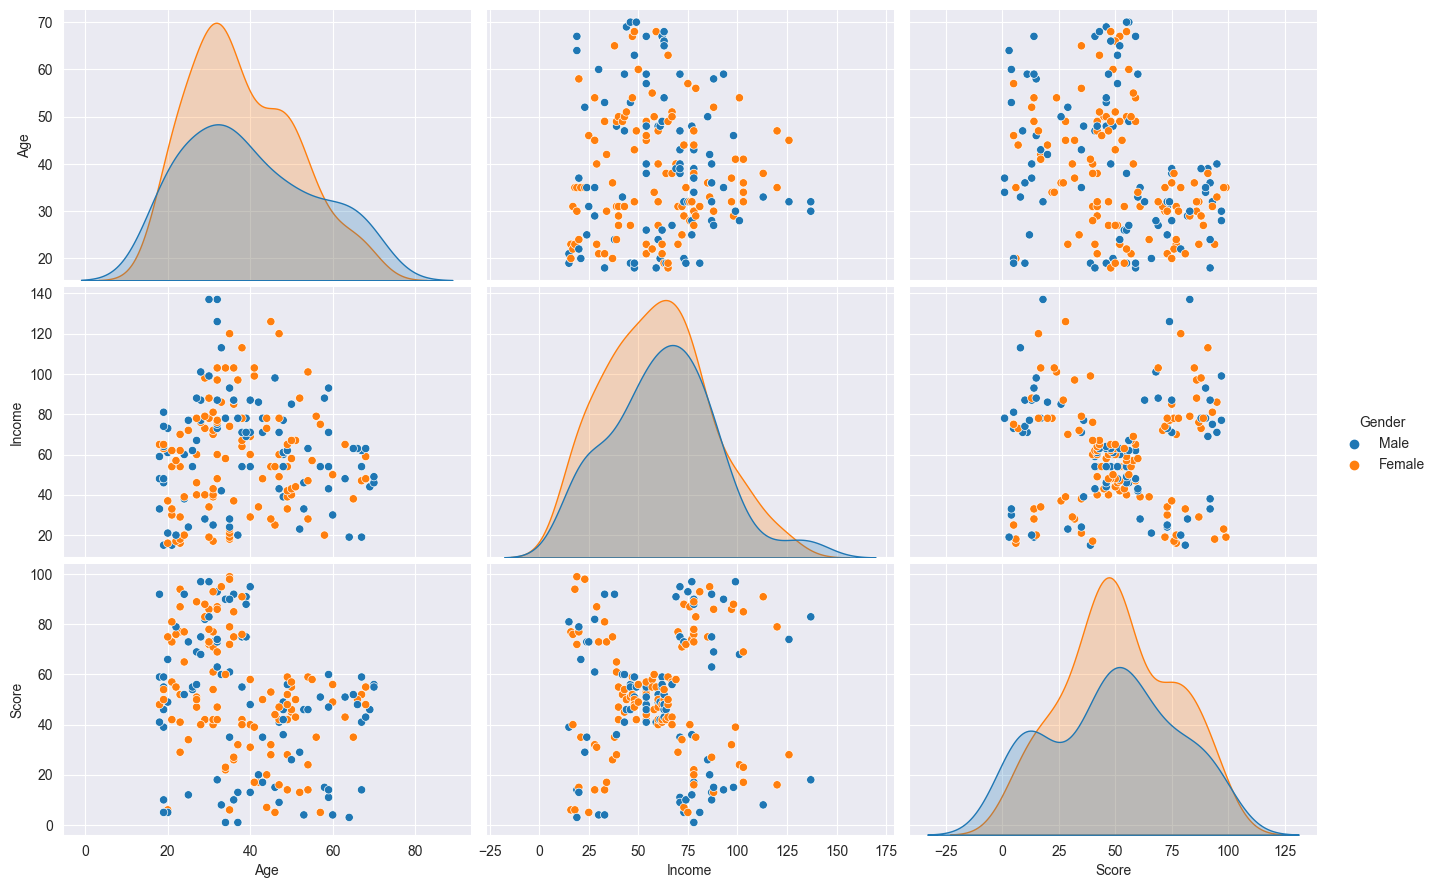

In [9]:
sns.pairplot(mall_customers.drop('CustomerID', axis=1), hue='Gender', height=3, aspect=1.5)

5. for age, income and score do subplots of boxplots with a fitting title

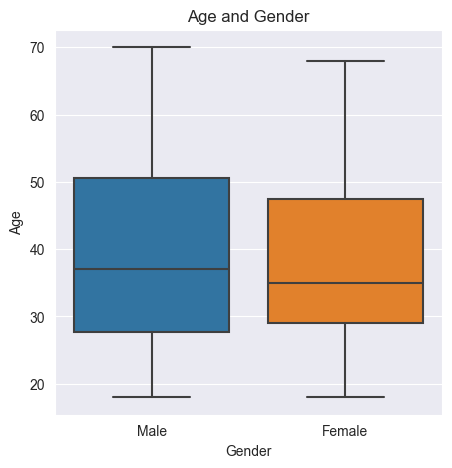

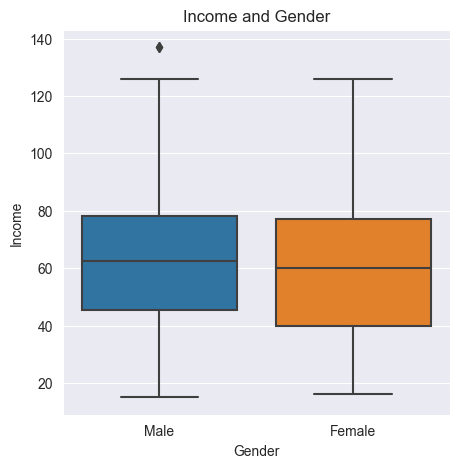

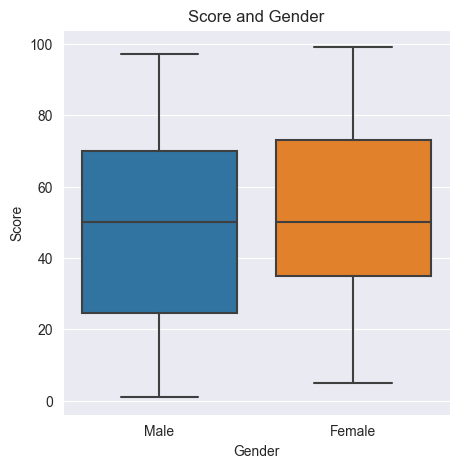

In [10]:
for col in ['Age', 'Income', 'Score']:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.boxplot(data=mall_customers, x='Gender', y=col, ax=ax)
    ax.set_title(f'{col} and Gender')
    plt.show()

6. calculate the wcss 1 to 11 clusters with kmeans clustering and plot it after to use the elbow method (drop ID and Gender before!)

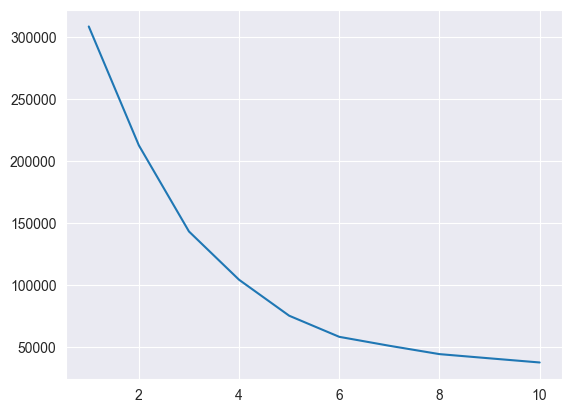

In [11]:
from sklearn.cluster import KMeans

X = mall_customers.drop(['CustomerID', 'Gender'], axis=1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

7. use the result to predict the y-kmeans

In [12]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


8. plot the clusters with different #cluster and see which fits best

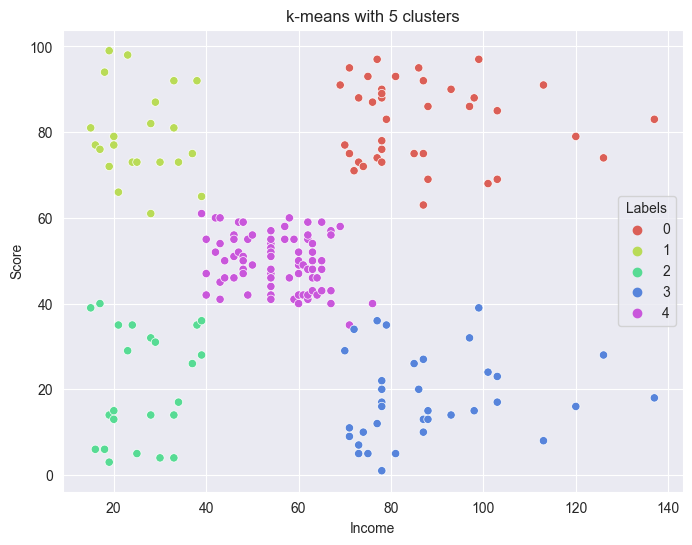

In [13]:
km3 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('k-means with 5 clusters')
plt.show()

9. make two swarmplots about the income and the score with the cluster size that was best

C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sonja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


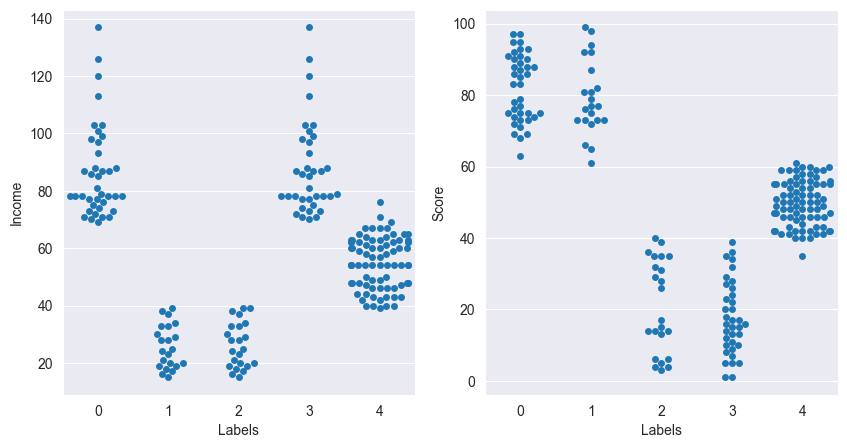

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
plt.show()

2nd Example - Iris
1. import the iris dataset
2. make a data set out of sepal length and the petal length

In [15]:
iris = datasets.load_iris()
data = pd.DataFrame({'sepal length': iris.data[:, 0], 'petal length': iris.data[:, 2]})

3. calculate the wcss of #clusters 1 to 11 and use the elbow method to find the best #clusters

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

4. print the y_kmeans

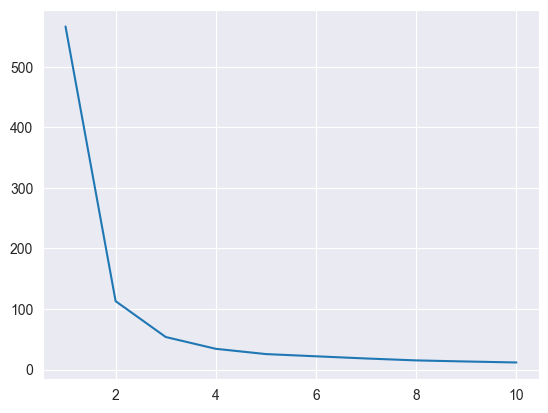

In [17]:
plt.plot(range(1, 11), wcss)

5. make a scatterplot with different #clusters and find out which one works best

In [18]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(data)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 1 2 2 3 2 2 2 1
 1 2 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1
 1 1]


<AxesSubplot: xlabel='sepal length', ylabel='petal length'>

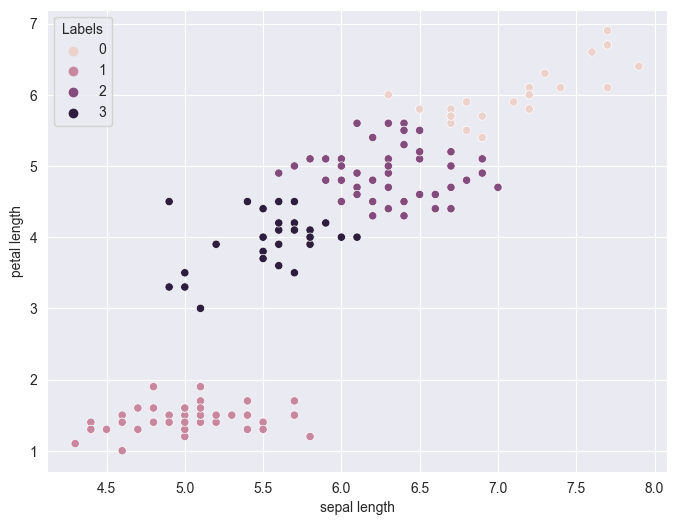

In [19]:
kmeans = KMeans(n_clusters=4).fit(data)
data['Labels'] = kmeans.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sepal length'], y=data['petal length'], hue=data['Labels'])
# palette=sns.color_palette('hls', 2)

# Data Visualization - Seaborn

1. load the sns dataset tips
2. create *one* barplot with smoker vs total_bill for both sexes
3. create *one* boxplot with day vs total_bill for both smokers and non-smokers
4. create *one* swarmplot with total_bills per day for both smoker and non-smokers

<AxesSubplot: xlabel='day', ylabel='total_bill'>

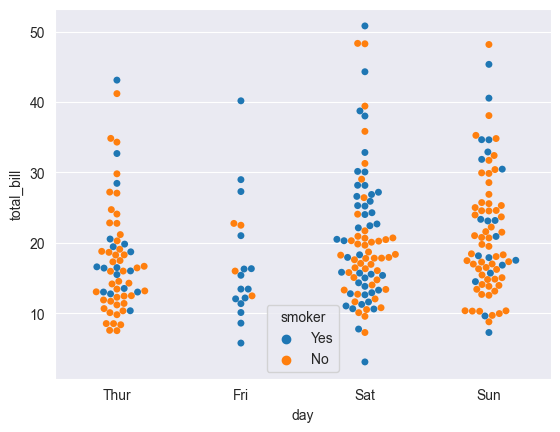

In [20]:
tips = sns.load_dataset('tips')
# sns.barplot(data=tips, x='smoker', y='total_bill', hue='sex')
# sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')
sns.swarmplot(data=tips, x='day', y='total_bill', hue='smoker')

5. create a scatterplot with relplot and then wit scatterplot (ToDo!!)
    - total_bill in comparison to the tip per day

<Figure size 1000x500 with 0 Axes>

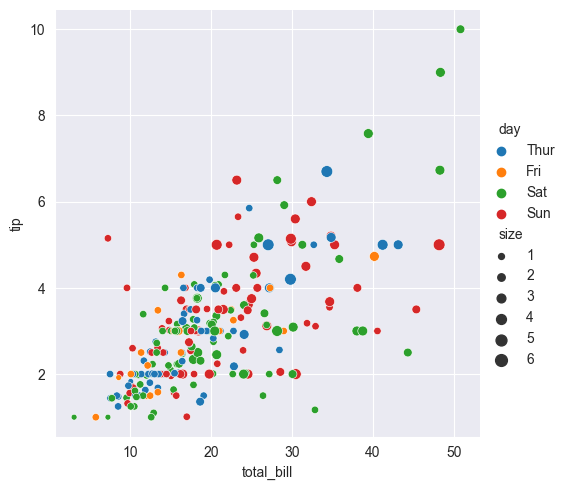

In [21]:
plt.figure(figsize=(10, 5))
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', size='size')

6. create a LMplot with the total bill in comparison to the tip for both smoker and non-smoker

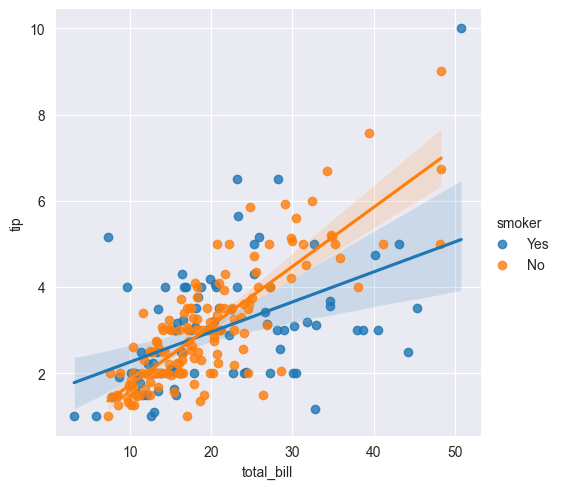

In [22]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')

# Data Visualization - Choropleth Map

1. import the datasets usa_county.csv and fips.csv and state_code.csv
2. group_by Province_State and county and find the maxima

In [23]:
usa_county = pd.read_csv('resources/usa_county.csv')
fips = pd.read_csv('resources/fips.csv')
state_code = pd.read_csv('resources/state_code.csv')

max_county = usa_county.groupby(by=['Province_State', 'county']).max().reset_index()

3. group_by and sum data by country: for deaths and confirmed cases
(if I only group_by province_state and not by county then i would have the state level)

In [24]:
death_county_agg = usa_county.groupby(by=['Province_State', 'county']).agg({'Deaths': sum}).reset_index()
confirmed_county_agg = usa_county.groupby(by=['Province_State', 'county']).agg({'Confirmed': sum}).reset_index()

4. merge both dataframes into one

In [25]:
county_data = pd.merge(death_county_agg, confirmed_county_agg)

5. transform the fips so that all have 5 numbers

In [26]:
fips['FIPS'] = fips['FIPS'].astype(str).str.zfill(5)

6. rename all the columns in the different dataframes and combine them

In [27]:
county_data = county_data.rename(columns={'Province_State': 'state'})
fips = fips.rename(columns={'State': 'code'})
county_data_combined = pd.merge(county_data, state_code, on=['state'], how='left')
county_data_combined = pd.merge(county_data_combined, fips, on=['code'], how='left')
county_data_combined

,state,county_x,Deaths,Confirmed,code,FIPS,county_y
0,Alabama,Autauga,803,35257,AL,01001,Autauga
1,Alabama,Autauga,803,35257,AL,01003,Baldwin
2,Alabama,Autauga,803,35257,AL,01005,Barbour
3,Alabama,Autauga,803,35257,AL,01007,Bibb
4,Alabama,Autauga,803,35257,AL,01009,Blount
...,...,...,...,...,...,...,...
303699,Wyoming,Weston,0,110,WY,56037,Sweetwater
303700,Wyoming,Weston,0,110,WY,56039,Teton
303701,Wyoming,Weston,0,110,WY,56041,Uinta
303702,Wyoming,Weston,0,110,WY,56043,Washakie


7. (load GeoJSON file containing the geometry information for US counties)

In [28]:
from urllib.request import urlopen
import json

with urlopen(r'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
counties['features'][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

8. print the choropleth map
9. (to change the range color: range_color=(0, 5000),
10. (if you wanted state-level: locations=covid_state['code'], locationmode='USA-states' instead of locations and geojson

In [29]:
import plotly.express as px

figure_counties_confirmed = px.choropleth(county_data_combined,
                                          locations='FIPS',
                                          geojson=counties,
                                          color='Confirmed',
                                          color_continuous_scale='RdPu',
                                          range_color=(0, 50000),
                                          scope='usa',
                                          hover_name='county',
                                          hover_data={'state': False, 'county': False, 'Deaths': True, 'Confirmed': True, 'code': False, 'FIPS': False})
figure_counties_confirmed.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['state', 'county_x', 'Deaths', 'Confirmed', 'code', 'FIPS', 'county_y'] but received: county

10. export the choropleth map to html

In [ ]:
figure_counties_confirmed.write_html('fig1_ny.html')

If you want to you could do that just in case!

In [ ]:
county_data_combined = county_data_combined.drop_duplicates().reset_index(drop=True)